<a href="https://colab.research.google.com/github/DBP625/DeepLearing_CampusX/blob/master/Copy_of_dropout_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate Data

In [2]:
X_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

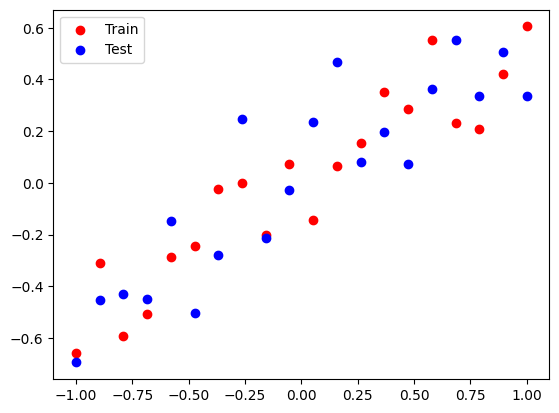

In [6]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model

In [7]:
model = Sequential()
model.add(Dense(128, input_dim=1, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])  #Tracking MSE
history = model.fit(X_train, y_train, epochs=500,
                    validation_data = (X_test, y_test),
                    verbose=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Test loss is 10% more than Train

In [8]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0008033798076212406, Test: 0.045426689088344574


In [9]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


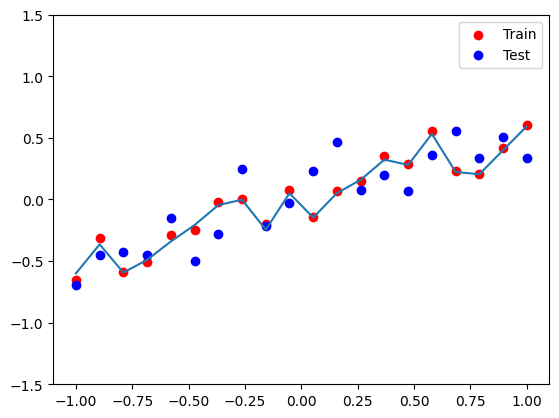

In [10]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [ ]:
### There is major gap between train and test
### Training loss ok, but Testing loss is increasing

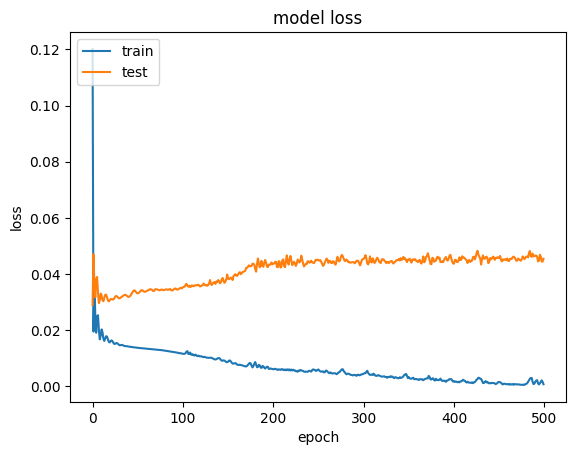

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Dropout Model

### Dropout is applied in the Hidden Layers
### But it is applied in output or not , wish

In [15]:
model = Sequential()
model.add(Dense(128, input_dim=1, activation="relu"))
model.add(Dropout(0.2)) #it means 20% Neurons are off

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model.fit(X_train, y_train, epochs=500,
                               validation_data = (X_test, y_test),
                               verbose=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train and Test loss are nearly same

In [16]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.010971599258482456, Test: 0.039538927376270294


In [ ]:
y_pred = model.predict(X_test)

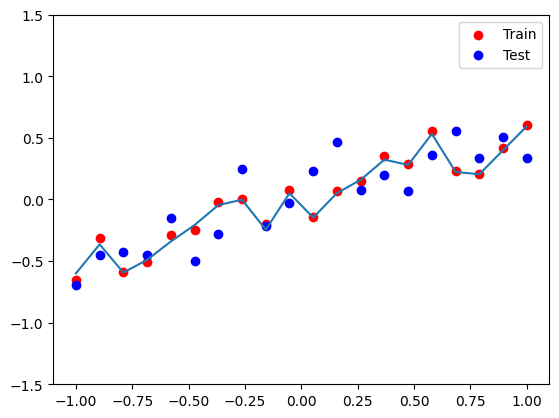

In [17]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

### Here we can see the training and testing losses are close

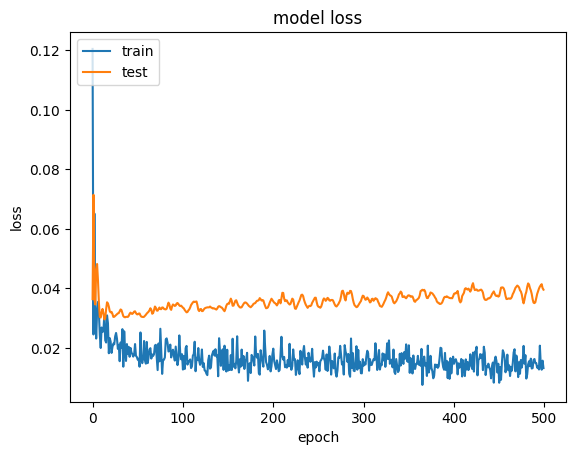

In [20]:
plt.plot(drop_out_history.history['loss'])
plt.plot(drop_out_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
model = Sequential()
model.add(Dense(128, input_dim=1, activation="relu"))
model.add(Dropout(0.5)) #it means 20% Neurons are off

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model.fit(X_train, y_train, epochs=500,
                               validation_data = (X_test, y_test),
                               verbose=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.013240909203886986, Test: 0.03780864179134369


In [23]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


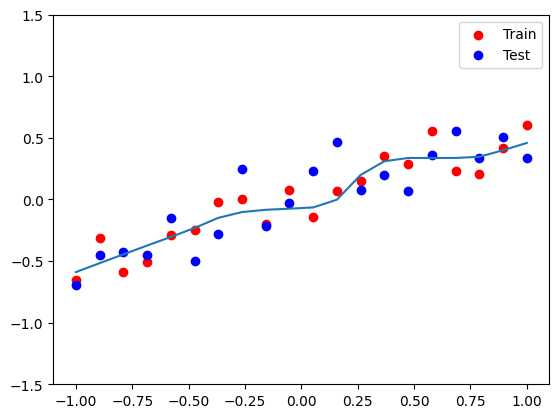

In [24]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

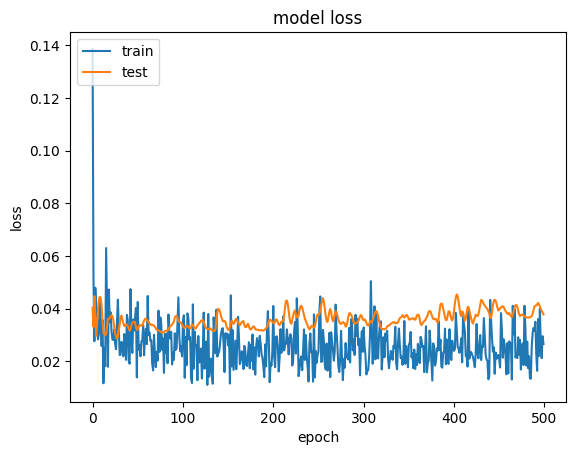

In [25]:
plt.plot(drop_out_history.history['loss'])
plt.plot(drop_out_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()